<a href="https://colab.research.google.com/github/lin3372/400_gan/blob/main/bk-generative_deep_learning/400_gan_02_03_deep_CNN_(iL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first convolutional neural network - CNN

# imports

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K 

from tensorflow.keras.datasets import cifar10

# data - cifar10

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture - CNN
32x32x3 ==> 4x4x10 ==> 3x3x20 ==> 1280 ==> 10 classes

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

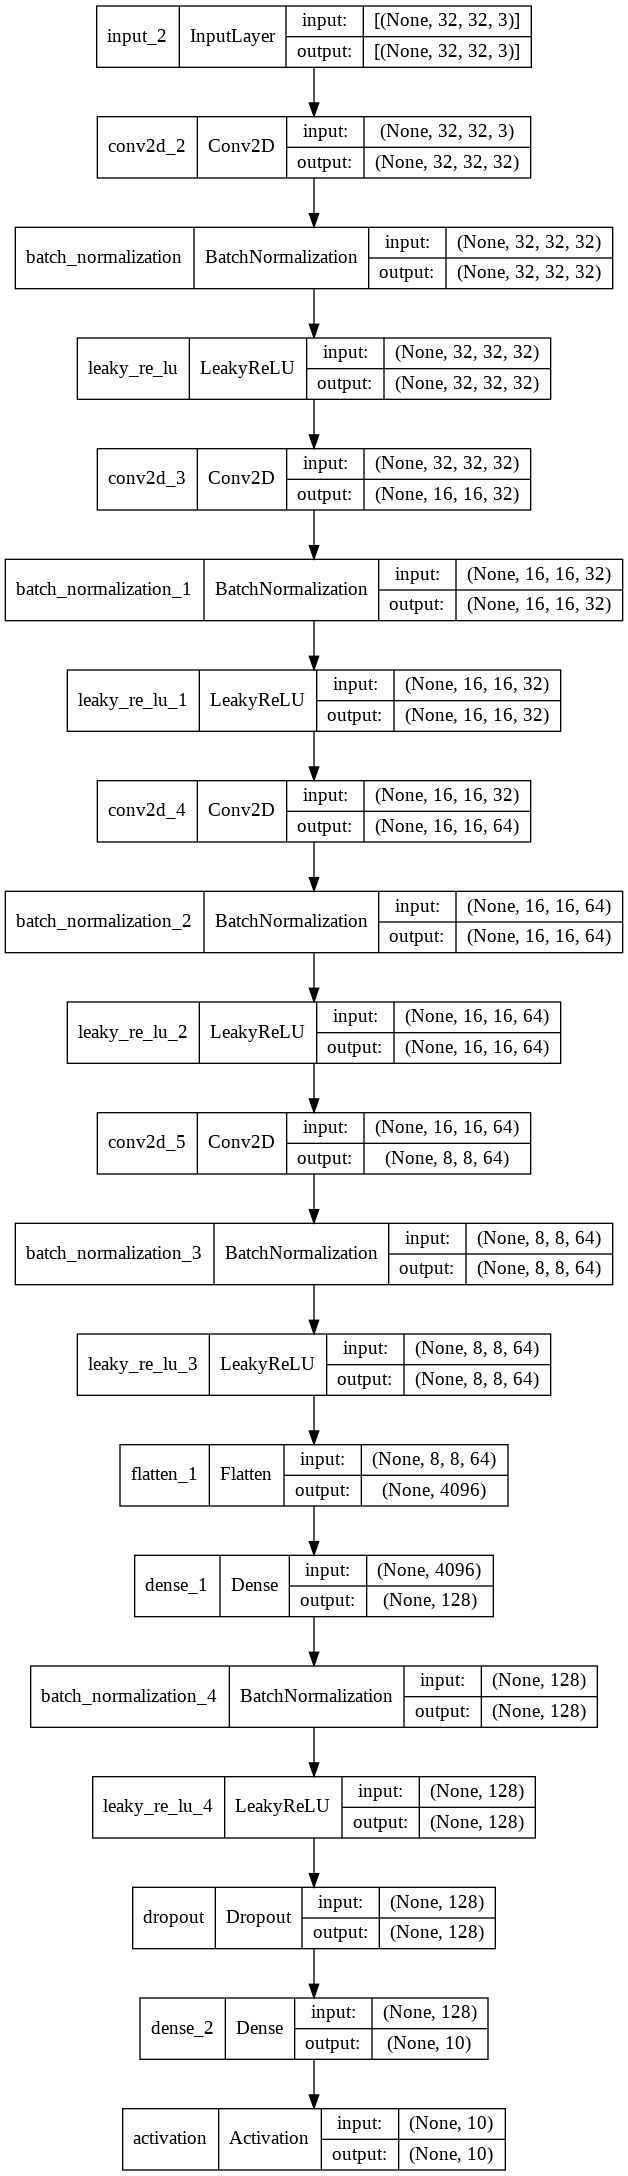

In [10]:
dot_img_file = 'model_400_gan.02.03_deep_CNN (iL).png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# train

In [11]:
opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 203s 128ms/step - loss: 1.5530 - accuracy: 0.4555 - val_loss: 1.2090 - val_accuracy: 0.5714
Epoch 2/10
1563/1563 [==============================] - 179s 114ms/step - loss: 1.1407 - accuracy: 0.5981 - val_loss: 1.1128 - val_accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 173s 111ms/step - loss: 1.0038 - accuracy: 0.6506 - val_loss: 1.0421 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 174s 112ms/step - loss: 0.9216 - accuracy: 0.6788 - val_loss: 1.0116 - val_accuracy: 0.6464
Epoch 5/10
1563/1563 [==============================] - 178s 114ms/step - loss: 0.8625 - accuracy: 0.6996 - val_loss: 0.9186 - val_accuracy: 0.6770
Epoch 6/10
1563/1563 [==============================] - 175s 112ms/step - loss: 0.8081 - accuracy: 0.7154 - val_loss: 0.8155 - val_accuracy: 0.7178
Epoch 7/10
1563/1563 [==============================] - 177s 113ms/step - loss: 0.7584 - accuracy: 0.7351 - val_

In [13]:
model.layers[6].get_weights()

[]

# analysis

In [14]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 9s 831ms/step - loss: 0.9932 - accuracy: 0.6567


[0.9931743144989014, 0.6567000150680542]

In [15]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

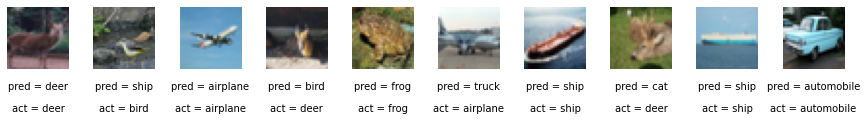

In [16]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)


# Log date/time and version info

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
from datetime import datetime
import pytz

# assuming now contains a timezone aware datetime
now = datetime.now()
tz = pytz.timezone('Asia/Taipei')
local_now = now.astimezone(tz)
print(local_now)

!python --version

print(f"tf={tf.__version__}")
print(f"numpy={np.__version__}")
print(f"pandas={pd.__version__}")



2021-12-18 09:57:13.367369+08:00
Python 3.7.12
tf=2.7.0
numpy=1.19.5
pandas=1.1.5


ivan.hp.lin
2021-12-18 09:57:13.367369+08:00
Python 3.7.12
tf=2.7.0
numpy=1.19.5
pandas=1.1.5